In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

import copy
import torch

from detectron2.data import detection_utils as utils

from detectron2.engine import DefaultTrainer

from detectron2.evaluation import COCOEvaluator
from detectron2.data import build_detection_test_loader, build_detection_train_loader

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Register Dataset
try:
    register_coco_instances('coco_trash_train', {}, '../../../dataset/train.json', '../../../dataset/')
except AssertionError:
    pass

try:
    register_coco_instances('coco_trash_test', {}, '../../../dataset/test.json', '../../../dataset/')
except AssertionError:
    pass

MetadataCatalog.get('coco_trash_train').thing_classes = ["General trash", "Paper", "Paper pack", "Metal", 
                                                         "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

[01/17 00:55:26 d2.data.datasets.coco]: Loaded 4883 images in COCO format from ../../../dataset/train.json
Saved output image to: ./output_image/0402_output.jpg


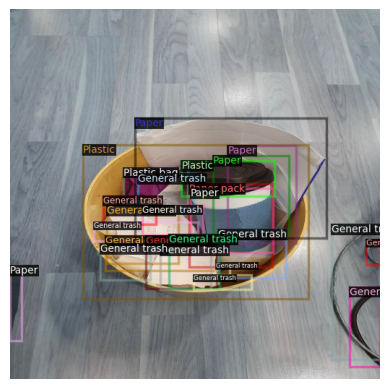

Saved output image to: ./output_image/2259_output.jpg


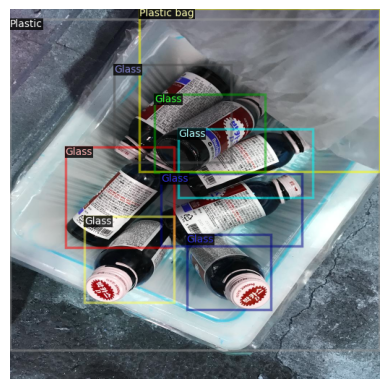

Saved output image to: ./output_image/0509_output.jpg


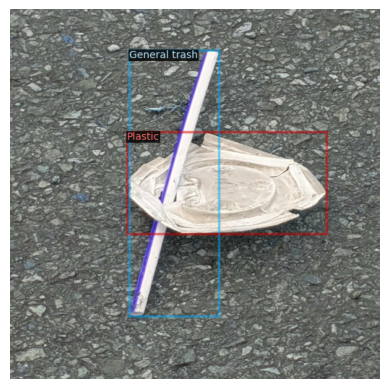

In [9]:
import matplotlib.pyplot as plt

dataset_dicts = DatasetCatalog.get('coco_trash_train')
metadata_dicts = MetadataCatalog.get('coco_trash_train')

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata_dicts, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    img_out = out.get_image()[:, :, ::-1]

    image_filename = os.path.basename(d["file_name"])
    output_image_file_path = os.path.join("./output_image", image_filename.replace(".jpg", "_output.jpg"))

    # 이미지 파일로 저장 (선택 사항)
    cv2.imwrite(output_image_file_path, img_out)

    # 저장된 이미지 파일의 경로 출력
    print(f"Saved output image to: {output_image_file_path}")

    # 이미지 출력
    plt.imshow(img_out)
    plt.axis('off')
    plt.show()

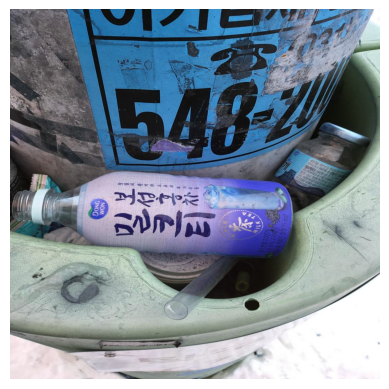

In [18]:
im = cv2.imread("../../../dataset/train/0001.jpg")

plt.imshow(im)
plt.axis('off')
plt.show()

In [20]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file("configs/COCO-Detection-NoisyAnchor/retinanet_R_101_FPN_3x_noisyanchor.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = "./outputs/model_final_r101_3x_noisyanchor.pth"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

Loading config configs/COCO-Detection-NoisyAnchor/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [21]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([52,  3, 36, 74, 39,  2, 36, 52, 74, 45,  4, 61, 39, 41, 73, 39, 55, 36,
        60,  1, 10,  0, 73, 55, 48, 71, 39, 41, 39, 39, 11, 39, 69,  8,  3,  2,
        43, 28, 14, 16, 60, 36,  1, 71,  6, 10, 13, 45, 12, 62, 56, 75,  0, 47,
        55, 53, 39, 13, 43, 45, 36, 53,  1, 59, 39, 39, 36, 37,  4, 51, 73, 43,
        28, 14, 46, 45, 60, 52, 13, 52,  4, 69, 63,  2, 40, 41,  3, 56,  8, 56,
        10, 39, 29, 59, 35, 13, 48, 43, 33, 73], device='cuda:0')
Boxes(tensor([[1.6317e+01, 4.4728e+02, 7.8638e+02, 7.1907e+02],
        [0.0000e+00, 2.0003e+01, 1.0240e+03, 1.0011e+03],
        [0.0000e+00, 4.9168e+02, 8.4441e+02, 9.0342e+02],
        [1.4791e+02, 0.0000e+00, 9.8048e+02, 4.6620e+02],
        [1.3047e+00, 4.4744e+02, 7.9425e+02, 7.3492e+02],
        [0.0000e+00, 2.0003e+01, 1.0240e+03, 1.0011e+03],
        [0.0000e+00, 4.0047e+01, 1.0229e+03, 1.0205e+03],
        [5.2817e+02, 4.8962e+02, 7.5635e+02, 5.5557e+02],
        [1.5906e+01, 3.4430e+01, 1.0153e+03, 8.9538e+02],
      

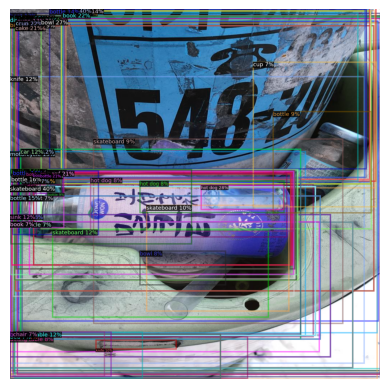

In [24]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
img_out = out.get_image()[:, :, ::-1]

# 이미지 파일로 저장 (선택 사항)
cv2.imwrite("./output_image/test.jpg", img_out)

plt.imshow(img_out)
plt.axis('off')
plt.show()

In [3]:
# config 불러오기
cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'))
cfg.merge_from_file('configs/COCO-Detection-NoisyAnchor/retinanet_R_101_FPN_3x_noisyanchor.yaml')
# cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection-NoisyAnchor/retinanet_R_50_FPN_1x_noisyanchor.yaml'))

Loading config configs/COCO-Detection-NoisyAnchor/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [4]:
# config 수정하기
cfg.DATASETS.TRAIN = ('coco_trash_train',)
cfg.DATASETS.TEST = ('coco_trash_test',)

cfg.DATALOADER.NUM_WOREKRS = 2

# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml')
# cfg.MODEL.WEIGHTS = 'configs/COCO-Detection-NoisyAnchor/retinanet_R_50_FPN_1x_noisyanchor.yaml'
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Detection-NoisyAnchor/retinanet_R_50_FPN_1x_noisyanchor.yaml')
cfg.MODEL.WEIGHTS = "./outputs/model_final_r101_3x_noisyanchor_down.pth"

# cfg.SOLVER.IMS_PER_BATCH = 4
# cfg.SOLVER.BASE_LR = 0.001
# cfg.SOLVER.MAX_ITER = 15000
# cfg.SOLVER.STEPS = (8000,12000)
# cfg.SOLVER.GAMMA = 0.005
# cfg.SOLVER.CHECKPOINT_PERIOD = 3000

cfg.OUTPUT_DIR = './output'

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10

cfg.TEST.EVAL_PERIOD = 3000

In [ ]:
# wandb 
import wandb

wandb.init(project='level2-an', name='detectron2')

cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='MMDetWandbHook',
         init_kwargs={'project': 'level2-an'},
         interval=10,
         log_checkpoint=True,
         log_checkpoint_metadata=True,
         num_eval_images=100)
]

In [5]:
# mapper - input data를 어떤 형식으로 return할지 (따라서 augmnentation 등 데이터 전처리 포함 됨)
import detectron2.data.transforms as T

def MyMapper(dataset_dict):
    dataset_dict = copy.deepcopy(dataset_dict)
    image = utils.read_image(dataset_dict['file_name'], format='BGR')
    
    transform_list = [
        T.RandomFlip(prob=0.5, horizontal=False, vertical=True),
        T.RandomBrightness(0.8, 1.8),
        T.RandomContrast(0.6, 1.3)
    ]
    
    image, transforms = T.apply_transform_gens(transform_list, image)
    
    dataset_dict['image'] = torch.as_tensor(image.transpose(2,0,1).astype('float32'))
    
    annos = [
        utils.transform_instance_annotations(obj, transforms, image.shape[:2])
        for obj in dataset_dict.pop('annotations')
        if obj.get('iscrowd', 0) == 0
    ]
    
    instances = utils.annotations_to_instances(annos, image.shape[:2])
    dataset_dict['instances'] = utils.filter_empty_instances(instances)
    
    return dataset_dict

In [6]:
# trainer - DefaultTrainer를 상속
class MyTrainer(DefaultTrainer):
    
    @classmethod
    def build_train_loader(cls, cfg): # sampler=None
        return build_detection_train_loader(
        cfg, mapper = MyMapper #, sampler = sampler
        )
    
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            os.makedirs('./output_eval', exist_ok = True)
            output_folder = './output_eval'
            
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [7]:
# train
os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)

trainer = MyTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/18 16:49:51 d2.engine.defaults]: Model:
RetinaNetNoisy(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (